In [53]:
import sys
import numpy as np
import scipy
import mne
import sklearn
import matplotlib
import pandas as pd

print("Python:", sys.version)
print("NumPy:", np.__version__)
print("SciPy:", scipy.__version__)
print("MNE:", mne.__version__)
print("Sklearn:", sklearn.__version__)
print("Environment ready ✅")



Python: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:09:21) [Clang 14.0.6 ]
NumPy: 2.4.0
SciPy: 1.16.3
MNE: 1.11.0
Sklearn: 1.8.0
Environment ready ✅


In [1]:
from scipy.io import loadmat
import os

data_path = os.path.join("..", "data", "DREAMER.mat")
mat = loadmat(data_path)

print("Keys in MAT file:")
print(mat.keys())


Keys in MAT file:
dict_keys(['__header__', '__version__', '__globals__', 'DREAMER'])


In [2]:
dreamer = mat['DREAMER']
type(dreamer), dreamer.shape


(numpy.ndarray, (1, 1))

In [3]:
dreamer_data = dreamer[0, 0]
type(dreamer_data)


numpy.void

In [4]:
dreamer_data.dtype.names


('Data',
 'EEG_SamplingRate',
 'ECG_SamplingRate',
 'EEG_Electrodes',
 'noOfSubjects',
 'noOfVideoSequences',
 'Disclaimer',
 'Provider',
 'Version',
 'Acknowledgement')

In [5]:
data = dreamer_data['Data']
type(data), data.shape


(numpy.ndarray, (1, 23))

In [45]:
import numpy as np

valence = []
arousal = []
dominance = []

n_subjects = data.shape[1]

for i in range(n_subjects):
    subj = data[0, i]

    v = subj['ScoreValence'][0, 0].flatten()
    a = subj['ScoreArousal'][0, 0].flatten()
    d = subj['ScoreDominance'][0, 0].flatten()

    valence.extend(v)
    arousal.extend(a)
    dominance.extend(d)

valence = np.array(valence)
arousal = np.array(arousal)
dominance = np.array(dominance)

valence.shape, arousal.shape, dominance.shape


((414,), (414,), (414,))

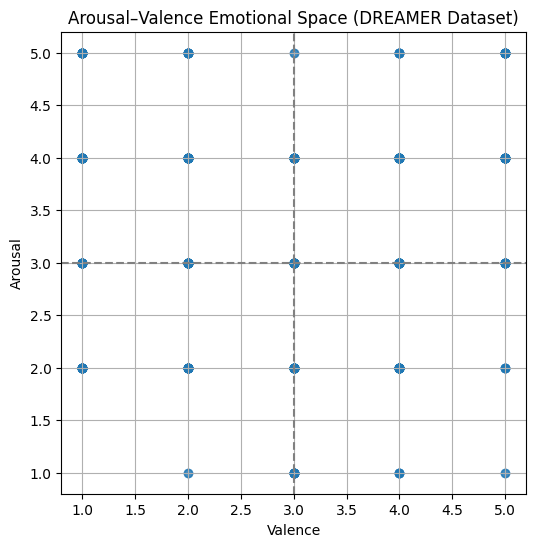

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(valence, arousal, alpha=0.6)

plt.axvline(3, linestyle="--", color="gray")
plt.axhline(3, linestyle="--", color="gray")

plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Arousal–Valence Emotional Space (DREAMER Dataset)")
plt.grid(True)

plt.show()


In [ ]:
### Interpretation: Arousal–Valence Emotional Space

The Arousal–Valence plot visualizes emotional stimuli in a 2D circumplex model.
The dashed lines at value 3 divide the space into four emotional quadrants:
high/low arousal and positive/negative valence.

The stimuli are spread across multiple quadrants, indicating that the dataset
captures a wide range of emotional states rather than being biased toward a
single emotion. Moderate clustering around the center suggests the presence
of emotionally neutral or mildly expressive stimuli.


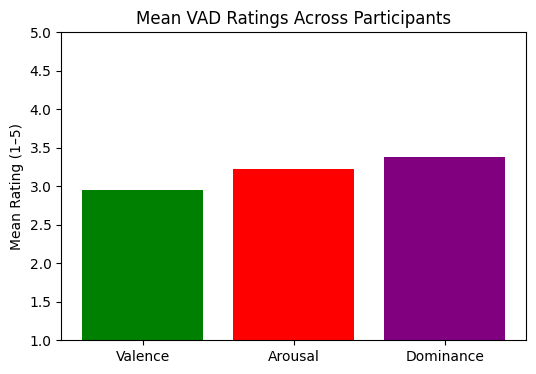

In [47]:
means = [
    np.mean(valence),
    np.mean(arousal),
    np.mean(dominance)
]

labels = ["Valence", "Arousal", "Dominance"]

plt.figure(figsize=(6, 4))
plt.bar(labels, means, color=["green", "red", "purple"])
plt.ylim(1, 5)

plt.ylabel("Mean Rating (1–5)")
plt.title("Mean VAD Ratings Across Participants")

plt.show()


In [ ]:
### Interpretation: Mean Valence, Arousal, and Dominance

The bar chart compares the average Valence, Arousal, and Dominance ratings
across all participants and stimuli. Valence and Dominance show relatively
similar mean values, indicating that emotionally positive stimuli are often
associated with a higher sense of control.

Arousal exhibits a slightly lower mean, suggesting that the stimuli are
moderately exciting rather than highly intense. This reflects a balanced
emotional dataset.


In [48]:
import pandas as pd
import seaborn as sns

vad_df = pd.DataFrame({
    "Valence": valence,
    "Arousal": arousal,
    "Dominance": dominance
})

corr = vad_df.corr(method="pearson")
corr


,Valence,Arousal,Dominance
Valence,1.000000,-0.026145,-0.115769
Arousal,-0.026145,1.000000,0.693290
Dominance,-0.115769,0.693290,1.000000


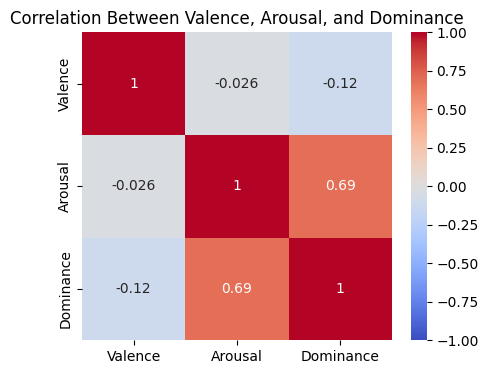

In [50]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Valence, Arousal, and Dominance")
plt.show()


In [52]:
'''Correlation Method:
Pearson correlation was used to quantify linear relationships between Valence, Arousal, and Dominance ratings, as these variables 
are continuous and approximately normally distributed.'''


'Correlation Method:\nPearson correlation was used to quantify linear relationships between Valence, Arousal, and Dominance ratings, as these variables \nare continuous and approximately normally distributed.'

In [ ]:
### Interpretation: Correlation Analysis of VAD Dimensions

The correlation matrix reveals a positive correlation between Valence and
Dominance, indicating that emotionally positive stimuli tend to evoke a
greater sense of control in participants.

Arousal shows weaker correlation with Valence, suggesting that emotional
intensity is relatively independent of emotional positivity. These trends
are consistent with established emotional models and validate the dataset’s
emotional structure.


In [6]:
subject0 = data[0, 0]
type(subject0), subject0.dtype.names


(numpy.ndarray,
 ('Age',
  'Gender',
  'EEG',
  'ECG',
  'ScoreValence',
  'ScoreArousal',
  'ScoreDominance'))

In [11]:
valence = []
arousal = []
dominance = []

num_subjects = data.shape[1]

for i in range(num_subjects):
    subj = data[0, i]
    
    v = subj['ScoreValence'][0, 0].astype(int).flatten()
    a = subj['ScoreArousal'][0, 0].astype(int).flatten()
    d = subj['ScoreDominance'][0, 0].astype(int).flatten()
    
    valence.append(v)
    arousal.append(a)
    dominance.append(d)

valence = np.array(valence)
arousal = np.array(arousal)
dominance = np.array(dominance)

valence.shape, arousal.shape, dominance.shape


((23, 18), (23, 18), (23, 18))

In [10]:
sv_raw = data[0, 0]['ScoreValence']
sv_clean = sv_raw[0, 0].astype(int).flatten()

sv_raw.shape, sv_clean.shape, sv_clean


((1, 1), (18,), array([4, 3, 5, 4, 4, 1, 5, 1, 1, 5, 4, 4, 4, 3, 2, 3, 1, 3]))

In [12]:
V = valence.reshape(-1)
A = arousal.reshape(-1)
D = dominance.reshape(-1)

V.shape, A.shape, D.shape


((414,), (414,), (414,))

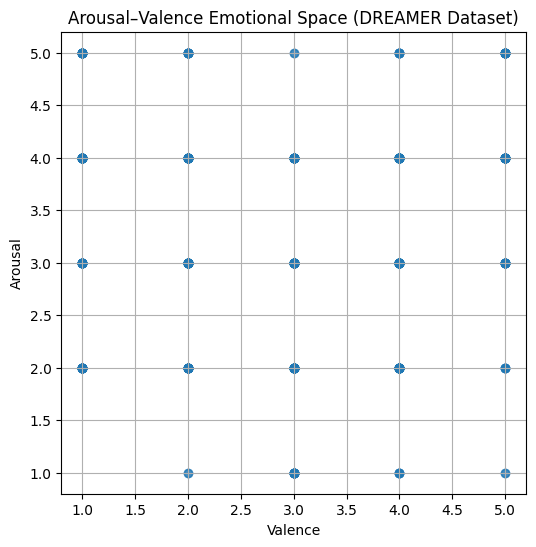

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(V, A, alpha=0.6)
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Arousal–Valence Emotional Space (DREAMER Dataset)")
plt.grid(True)
plt.show()


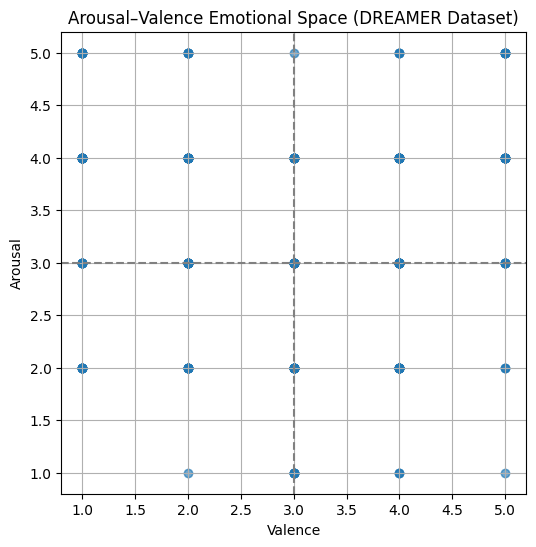

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(V, A, alpha=0.4)
plt.axhline(y=3, color='gray', linestyle='--')
plt.axvline(x=3, color='gray', linestyle='--')
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Arousal–Valence Emotional Space (DREAMER Dataset)")
plt.grid(True)
plt.show()
